<a href="https://colab.research.google.com/github/zabop/autoeap/blob/master/examples/usage_of_detrender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### If you are in Google Colab, first install the needed packages

In [ ]:
!pip install autoeap lightkurve

## This example shows how to apply the PDM-based detrender to any light curve

First, we need a light curve. In this example we use EPIC220209683, and assign a custom aperture by hand.

In [1]:
import lightkurve as lk
import numpy as np

Download the TPF:

In [2]:
tpf = lk.search_targetpixelfile('EPIC220209683').download()

Assign an aperture and plot it on the TPF:

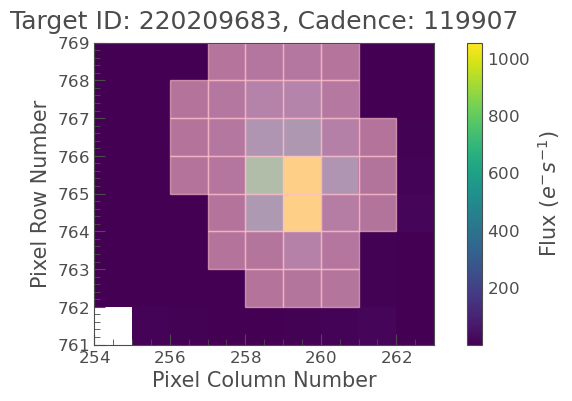

In [3]:
aperture = np.zeros_like(tpf.flux[0,],dtype=bool)

aperture[7,3:7] = True
aperture[6,2:7] = True
aperture[5,2:8] = True
aperture[4,2:8] = True
aperture[3,3:8] = True
aperture[2,3:7] = True
aperture[1,4:7] = True


tpf.plot(aperture_mask=aperture);

Create a light curve using our aperture and plot it:

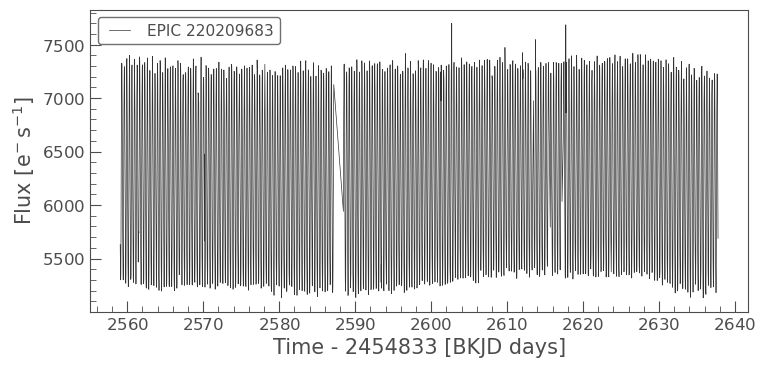

In [4]:
lc = tpf.to_lightcurve(aperture_mask=aperture).remove_outliers()

lc.plot();

## Now we have a light curve that needs to be detrended

The `detrend_wrt_PDM` method can be use in case of arbitrary light curves with given times, measurements (flux) and errors.

In [5]:
from autoeap.detrender import detrend_wrt_PDM

In [6]:
# For clarity, the time, flux and error values are separated

time =     lc.astropy_time.value
flux =     lc.flux
flux_err = lc.flux_err

#### The detrender fits a polynomial w.r.t. the PDM variance and removes it from the light curve

- the polynomial order can be set automatically (`'auto'`) or manually by passing any integer number
- the `sigma` controls the level of outlier clipping, which is done before the detrending 

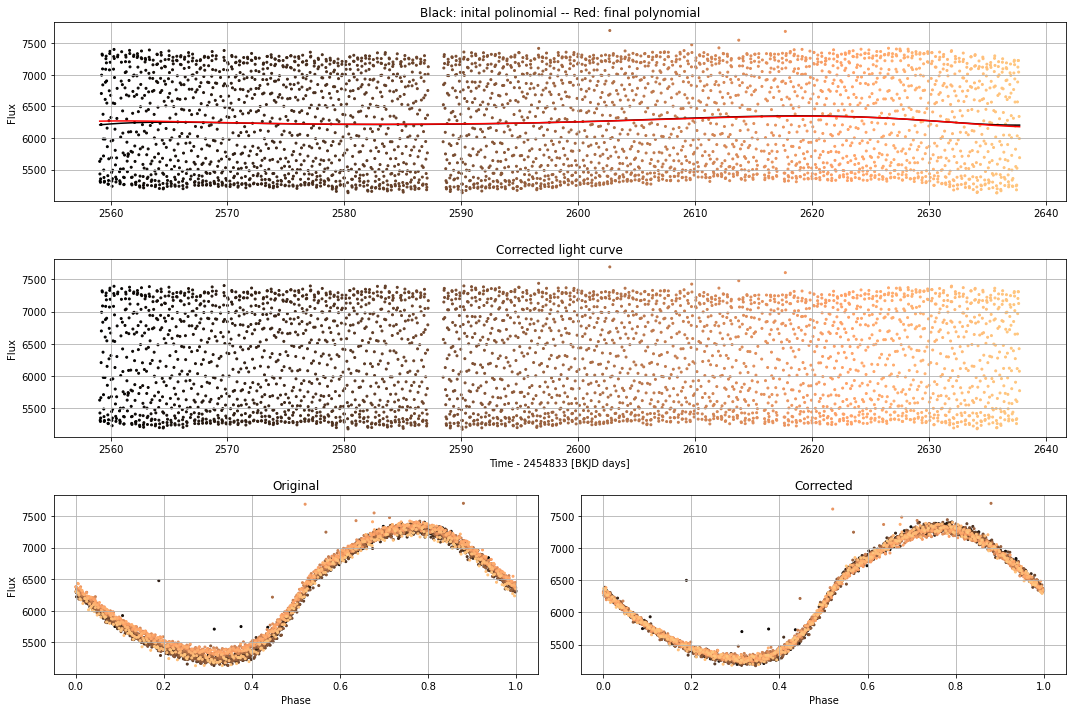

In [7]:
corrflux = detrend_wrt_PDM(time,               # Time values
                           flux,               # Flux values
                           flux_err,           # Flux errors
                           polyorder='auto',   # Polynomial order or 'auto'
                           sigma=10,           # Sigma for sigma clipping before PDM calculation
                           show_plots=True,    # Show the detrending process
                           save_plots=False,   # Save the detrending process plot
                           filename=None)      # using this filename as PNG.

The detrended flux is returned:

In [8]:
corrflux

array([5625.92798311, 5426.42166598, 5313.81091998, ..., 6423.59267093,
       6074.51608657, 5772.1451761 ])